In [1]:
#Importing libraries necessary for this project
import numpy as np
import pandas as pd
from time import time

# importing libraries for visuallization
import seaborn as sns
import matplotlib.pyplot as plt
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

from __future__ import division


In [2]:
# Loading the Census dataset
data = pd.read_csv("census.csv")

In [3]:
# Will Display the first record
data.head(n=2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [4]:
# checking datatype of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [5]:
#Total no of records
n_records = len(data)

In [6]:
# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] =='>50K'])

In [7]:
# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

In [8]:
# Percentage of individuals whose income is more than $50,000
greater_percent = 100 * n_greater_50k/n_records

In [9]:
# Printing Results
print ("Total no of Records: {}".format(n_records))
print("Individuals making more than 50K: {}".format(n_greater_50k))
print("Individuals making at_most 50K: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total no of Records: 45222
Individuals making more than 50K: 11208
Individuals making at_most 50K: 34014
Percentage of individuals making more than $50,000: 24.78%


###EDA

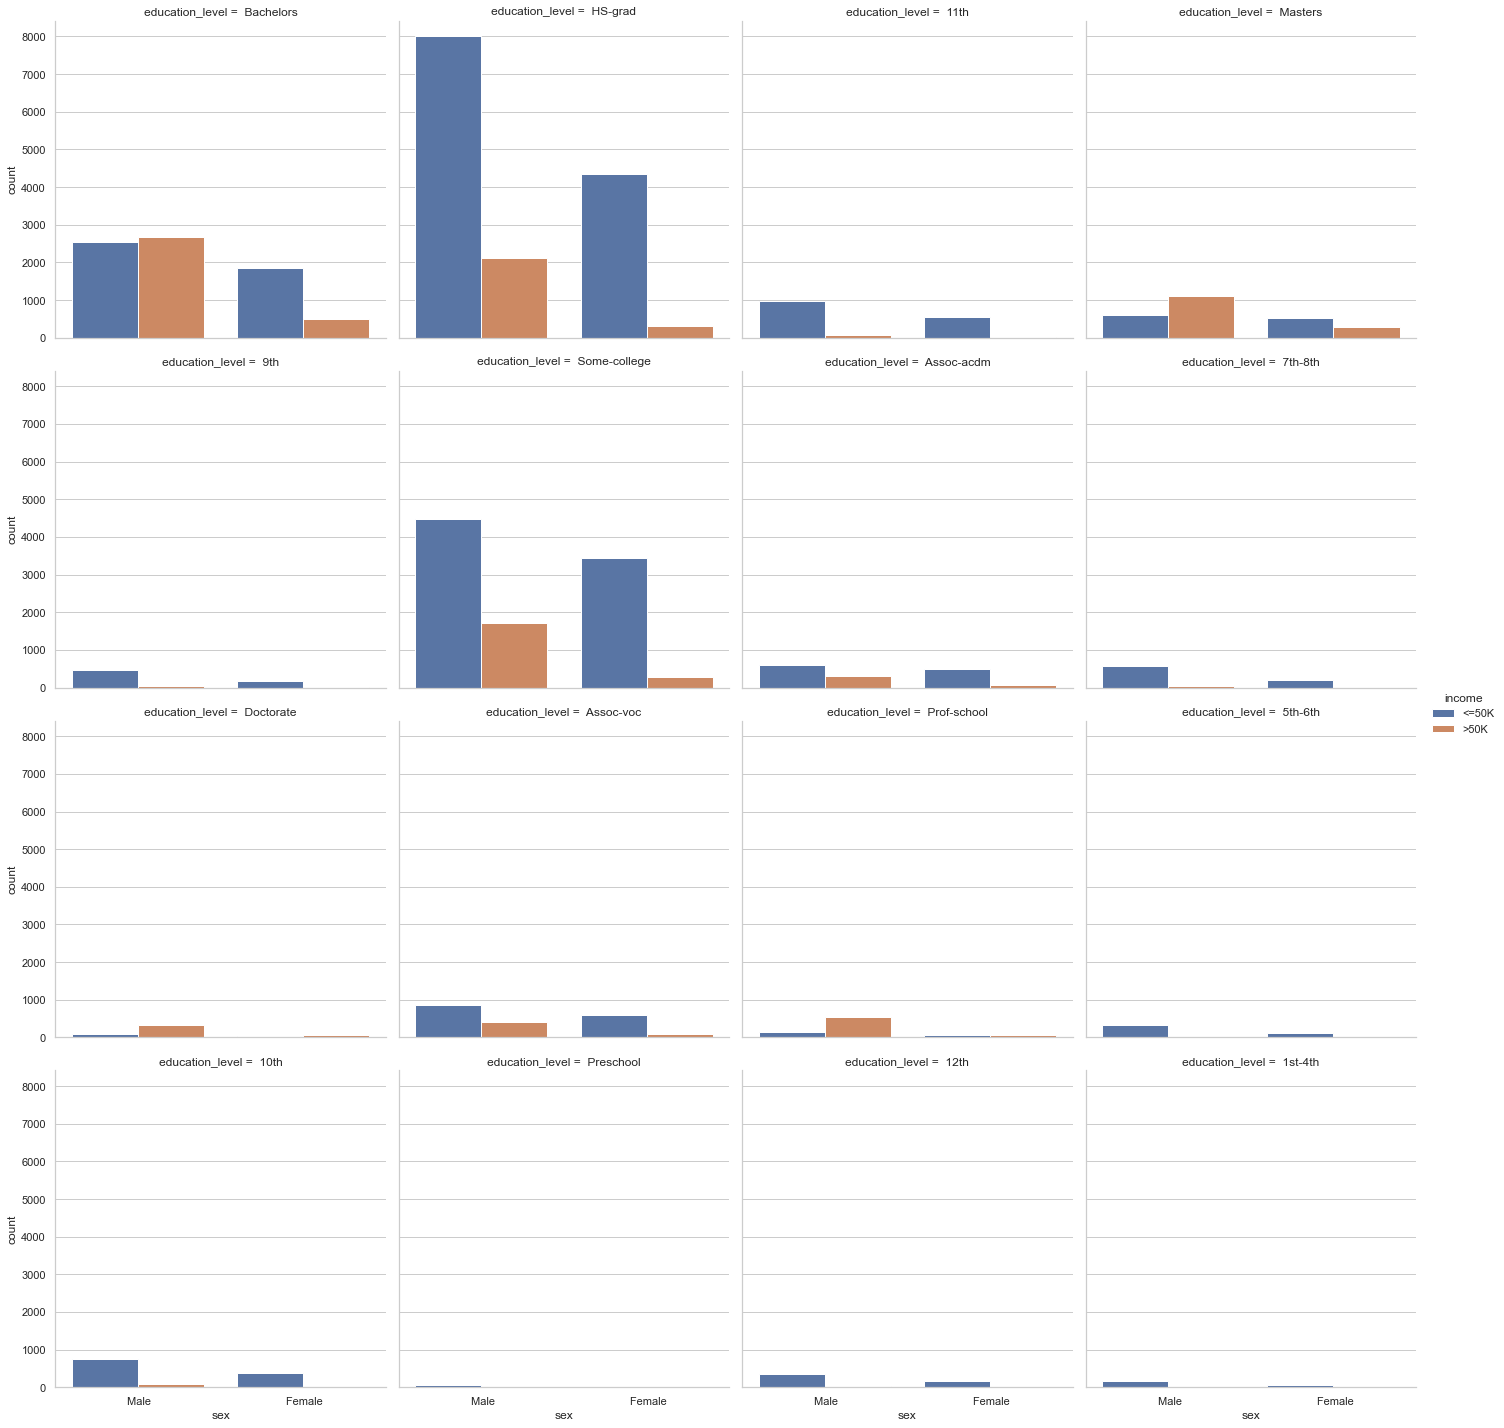

In [10]:
sns.set(style="whitegrid", color_codes=True)
sns.catplot(x='sex', col='education_level', data=data, hue='income', kind='count', col_wrap=4)

## Preprocessing

In [17]:
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (17,8));

    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)


[Text(0, 0, '0'),
 Text(0, 500, '500'),
 Text(0, 1000, '1000'),
 Text(0, 1500, '1500'),
 Text(0, 2000, '>2000')]

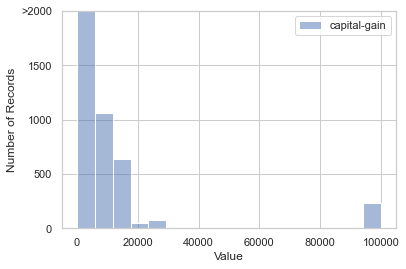

In [40]:
ax =sns.histplot(data=data[['capital-gain']])
ax.set_xlabel("Value")
ax.set_ylabel("Number of Records")
ax.set_ylim((0, 2000))
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

[Text(0, 0, '0'),
 Text(0, 500, '500'),
 Text(0, 1000, '1000'),
 Text(0, 1500, '1500'),
 Text(0, 2000, '>2000')]

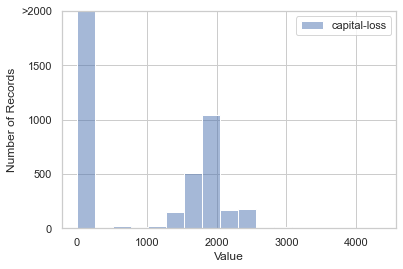

In [42]:
ax =sns.histplot(data=data[['capital-loss']])
ax.set_xlabel("Value")
ax.set_ylabel("Number of Records")
ax.set_ylim((0, 2000))
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

[Text(0, 0, '0'),
 Text(0, 500, '500'),
 Text(0, 1000, '1000'),
 Text(0, 1500, '1500'),
 Text(0, 2000, '>2000')]

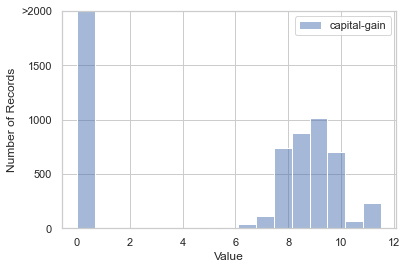

In [29]:
ax =sns.histplot(data=data[['capital-gain']].apply(lambda x: np.log(x + 1)))
ax.set_xlabel("Value")
ax.set_ylabel("Number of Records")
ax.set_ylim((0, 2000))
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])
             

[Text(0, 0, '0'),
 Text(0, 500, '500'),
 Text(0, 1000, '1000'),
 Text(0, 1500, '1500'),
 Text(0, 2000, '>2000')]

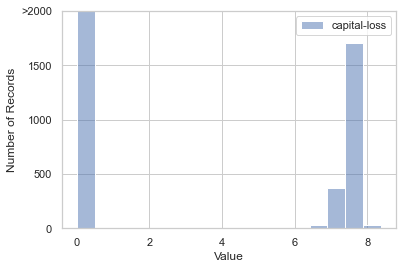

In [36]:
ax =sns.histplot(data=data[['capital-loss']].apply(lambda x: np.log(x + 1)))
ax.set_xlabel("Value")
ax.set_ylabel("Number of Records")
ax.set_ylim((0, 2000))
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, '>2000'])

## Feature Scaling

In [45]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


## Data Preprocessing

In [46]:
features_raw = data.drop('income', axis = 1)

In [47]:
features = pd.get_dummies(features_raw)

In [48]:
income_raw = data['income']

In [49]:
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

In [50]:
encoded = list(features.columns)

In [51]:
print ("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


## Model

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,income, test_size=0.2, random_state=0)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## Evaluating Model Performance

*** Naive Predictor Performance 

In [60]:
accuracy = n_greater_50k / n_records

# Calculating precision
precision = n_greater_50k / (n_greater_50k + n_at_most_50k)

#Calculating recall
recall = n_greater_50k / (n_greater_50k + 0)

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


## Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtree = DecisionTreeClassifier()

In [74]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
predictions = dtree.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6840
           1       0.63      0.61      0.62      2205

    accuracy                           0.82      9045
   macro avg       0.75      0.75      0.75      9045
weighted avg       0.82      0.82      0.82      9045



In [81]:
accuracy = (0.75/0.82)*100

In [82]:
print(accuracy)

91.46341463414635


In [83]:
print(confusion_matrix(y_test,predictions))

[[6047  793]
 [ 853 1352]]


## Random Forest Classifier 

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc = RandomForestClassifier(n_estimators=300)

In [91]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [92]:
predictions = rfc.predict(X_test)

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6840
           1       0.71      0.63      0.66      2205

    accuracy                           0.85      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.85      0.84      9045



In [94]:
accuracy = (0.80/0.84)*100

In [95]:
print(accuracy)

95.23809523809524


In [96]:
print(confusion_matrix(y_test,predictions))

[[6265  575]
 [ 823 1382]]


In [97]:
from sklearn.svm import SVC

In [98]:
sv = SVC()

In [99]:
sv.fit(X_train,y_train)

SVC()

In [102]:
predictions = sv.predict(X_test)

In [103]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6840
           1       0.73      0.27      0.39      2205

    accuracy                           0.80      9045
   macro avg       0.76      0.62      0.63      9045
weighted avg       0.78      0.80      0.76      9045



In [104]:
print(confusion_matrix(y_test,predictions))

[[6617  223]
 [1616  589]]


## AdaBoost Classsifier

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
abc = AdaBoostClassifier()

In [107]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [108]:
predictions = abc.predict(X_test)

In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6840
           1       0.76      0.60      0.67      2205

    accuracy                           0.86      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045



In [110]:
acc = (0.82/0.85)*100
print(acc)

96.47058823529412


In [111]:
print(confusion_matrix(y_test,predictions))

[[6426  414]
 [ 874 1331]]


## This best performed Model is AdaBoostClassifier

## Impoortant Feature Extraction

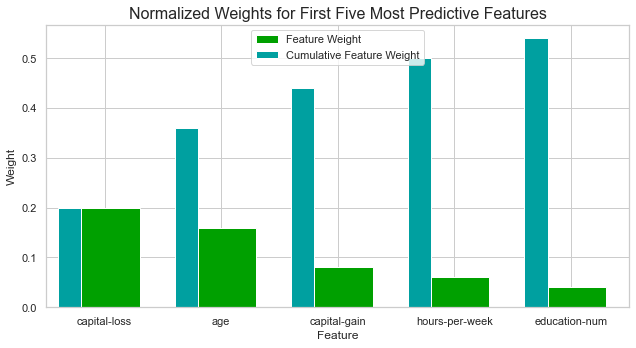

In [115]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)